# FRF FILES

## G-Drive

In [51]:
"""from google.colab import drive
drive.mount('/gdrive')"""

"from google.colab import drive\ndrive.mount('/gdrive')"

## Libraries

In [52]:
import os
import glob
import pandas as pd
import numpy as np
from scipy import interpolate
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def df_column_switch(df, column1, column2):
    i = list(df.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df

In [54]:
dir = r'C:\Users\pc\OneDrive_GTU\OneDrive - Gebze Teknik Üniversitesi\Tez\Proje\Dissipation Projects\11 - Herbers et al. (2006) - (DUCK94)\FRF Bottom\Oct22'

In [55]:
os.chdir(dir)

In [56]:
date = glob.glob('*.xlsx')

In [57]:
date[0:5]

['19940803_FRF-new.xlsx',
 '19940810_FRF-new.xlsx',
 '19940812_FRF-new.xlsx',
 '19940816_FRF-new.xlsx',
 '19940818_FRF-new.xlsx']

## Interpolation Process

In [58]:
#o = -1

In [59]:
date[o]

'19941121_FRF-new.xlsx'

In [60]:
Data1 = pd.read_excel(date[o])
Data1 = Data1[['Profile Number', 'xFRF', 'yFRF', 'Elevation', 'Date']]
Datalow = Data1.loc[(Data1['Profile Number'] == 905)].reset_index()
Datahigh = Data1.loc[(Data1['Profile Number'] == 937)].reset_index()

y_value defines longshore distance (y-axis) where the sensors located in DUCK94

In [61]:
y_value = 929

It will find out the closest 2 profiles to the sensor locations

In [62]:
p_num = find_closest(Data1['Profile Number'].values,value=y_value)

In [63]:
if p_num < y_value:
  Data_up = Data1.loc[(Data1['Profile Number'] > p_num)]
  Datahigh = Data_up[(Data_up['Profile Number'] == Data_up['Profile Number'].values.min())]
  Data2 = Data1.loc[(Data1['Profile Number'] < y_value)]
  Datalow = Data2[(Data2['Profile Number'] == Data2['Profile Number'].values.max())]
elif p_num > y_value:
  Data_down = Data1.loc[(Data1['Profile Number'] < p_num)]
  Datalow = Data_down[(Data_down['Profile Number'] == Data_down['Profile Number'].values.max())]
  Data2 = Data1.loc[(Data1['Profile Number'] > y_value)]
  Datahigh = Data2[(Data2['Profile Number'] == Data2['Profile Number'].values.min())]

In [98]:
date[o]

'19941121_FRF-new.xlsx'

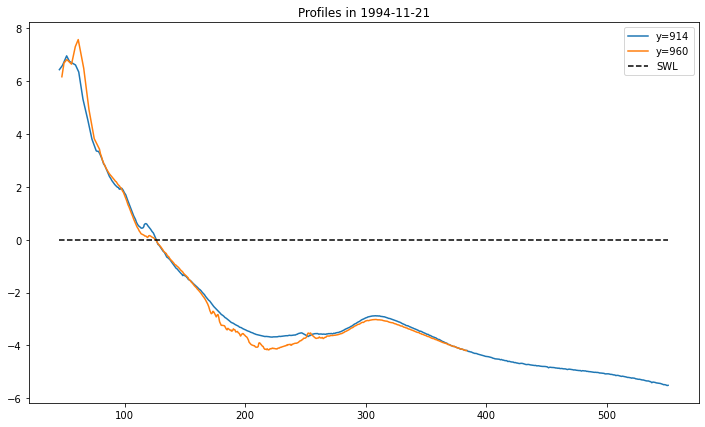

In [99]:
label1= 'y=' + str(Middle_1.y.values[0])
label2 = 'y=' + str(Middle_2.y.values[0])
plt.figure(figsize=(12, 7))
plt.plot(Datalow.xFRF.values,Datalow.Elevation.values, label=label1)
# plt.show()
plt.plot(Datahigh.xFRF.values,Datahigh.Elevation.values, label=label2)
plt.plot(Datalow.xFRF.values, [0]*len(Datalow.Elevation.values), 'k--', label='SWL')
plt.legend(loc='best')
plt.title("Profiles in 1994-11-21")
plt.show()

Datalow & Datahigh shows the profiles which will interpolate to y_value

But those profiles doesn't start and end same point in x-axis (cross-shore). Therefore, common points will interpolate. Tail of the ultimate profile will be the tail of long profile of them.
Head of the ultimate profile will assume starts same point.

In [65]:
if Datahigh.xFRF.values.max() < Datalow.xFRF.values.max():
  Middle1 = Datalow.loc[(Datalow['xFRF'] < Datahigh.xFRF.values.max())]
  Middle2 = Datahigh
  Tail = Datalow.loc[(Datalow['xFRF'] > Datahigh.xFRF.values.max())]
else:
  Middle1 = Datahigh.loc[(Datahigh['xFRF'] < Datalow.xFRF.values.max())]
  Middle2 = Datalow
  Tail = Datahigh.loc[(Datahigh['xFRF'] > Datalow.xFRF.values.max())]

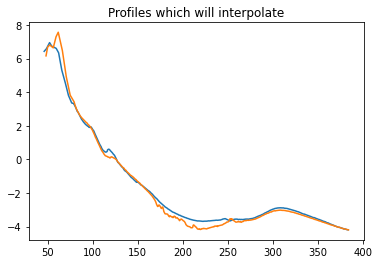

In [66]:
plt.plot(Middle1.xFRF.values,Middle1.Elevation.values)
# plt.show()
plt.plot(Middle2.xFRF.values,Middle2.Elevation.values)
plt.title("Profiles which will interpolate")
plt.show()

In [67]:
first_y = Middle1['Profile Number'].values[0]
second_y = Middle2['Profile Number'].values[0]

X values will be integer

In [68]:
x_veri = Middle1.xFRF.values
d_veri = Middle1.Elevation.values

x = np.arange(int(x_veri.min()+1), int(x_veri.max()), 1)

f = interpolate.interp1d(x_veri, d_veri, kind='linear')
d = f(x)
y_1 = [first_y]*len(x)
Middle_1 = pd.DataFrame({'x': x, 'Elevation': d, 'y': y_1})
Middle_1

,x,Elevation,y
0,46,6.430655,914
1,47,6.493490,914
2,48,6.556326,914
3,49,6.639326,914
4,50,6.744172,914
...,...,...,...
332,378,-4.117098,914
333,379,-4.138959,914
334,380,-4.138132,914
335,381,-4.156000,914


In [69]:
x_veri = Middle2.xFRF.values
d_veri = Middle2.Elevation.values

x = np.arange(int(x_veri.min()+1), int(x_veri.max()), 1)

f = interpolate.interp1d(x_veri, d_veri, kind='linear')
d = f(x)
y_2 = [second_y]*len(x)
Middle_2 = pd.DataFrame({'x': x, 'Elevation': d, 'y':y_2})
Middle_2

,x,Elevation,y
0,48,6.164632,960
1,49,6.458153,960
2,50,6.691550,960
3,51,6.745536,960
4,52,6.799522,960
...,...,...,...
330,378,-4.114012,960
331,379,-4.131998,960
332,380,-4.142133,960
333,381,-4.154120,960


Defining the head of the profile

In [70]:
minn = min(len(Middle_1.x.values),len(Middle_2.x.values))

In [71]:
idx2 = len(Middle_1.x.values)-minn
idx3 = len(Middle_2.x.values)-minn
Middle_1 = Middle_1.iloc[idx2:, :]
Middle_2 = Middle_2.iloc[idx3:, :]

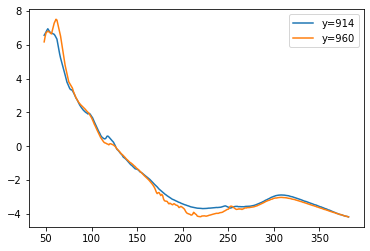

In [72]:
label1= 'y=' + str(Middle_1.y.values[0])
label2 = 'y=' + str(Middle_2.y.values[0])
plt.plot(Middle_1.x.values, Middle_1.Elevation.values, label=label1)
plt.plot(Middle_2.x.values, Middle_2.Elevation.values, label=label2)
plt.legend(loc='best')
plt.show()

Interpolation between 2 profiles

In [73]:
y_dif = Middle_2.y.values[0]-Middle_1.y.values[0]
Elevation_dif = np.subtract(Middle_2.Elevation.values,Middle_1.Elevation.values)
sum_y = (Elevation_dif/y_dif)*(y_value-Middle_1.y.values[0])
new_elevation = [a + b for a, b in zip(Middle_1.Elevation.values, sum_y)]

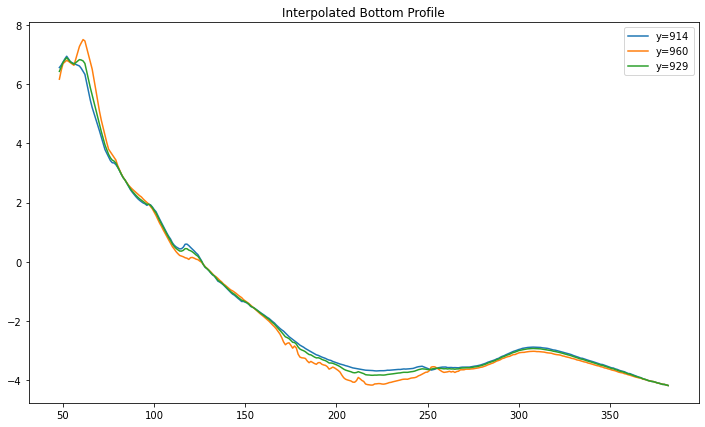

In [122]:
label1= 'y=' + str(Middle_1.y.values[0])
label2 = 'y=' + str(Middle_2.y.values[0])
label3 = 'y=' + str(y_value)
plt.figure(figsize=(12, 7))
plt.plot(Middle_2.x.values, Middle_1.Elevation.values, label=label1)
plt.plot(Middle_2.x.values, Middle_2.Elevation.values, label=label2)
plt.plot(Middle_2.x.values, new_elevation, label=label3)
plt.legend(loc='best')
plt.title("Interpolated Bottom Profile")
plt.show()

Create the profile without tail

In [75]:
profile_head = pd.DataFrame({'xFRF':Middle_2.x.values, 'Elevation':new_elevation, 'yFRF': [y_value]*len(Middle_2.x.values)})
profile_head

,xFRF,Elevation,yFRF
0,48,6.428599,929
1,49,6.580248,929
2,50,6.727013,929
3,51,6.815274,929
4,52,6.893706,929
...,...,...,...
330,378,-4.116092,929
331,379,-4.136689,929
332,380,-4.139437,929
333,381,-4.155387,929


Regulate the tail and add the profile

In [76]:
if len(Tail.xFRF.values) < 2:
    Tail = Tail.append(Tail)

In [77]:
x_veri = Tail.xFRF.values
d_veri = Tail.Elevation.values

x = np.arange(int(x_veri.min()+1), int(x_veri.max()), 1)

f = interpolate.interp1d(x_veri, d_veri, kind='linear')
d = f(x)
Tail_DF = pd.DataFrame({'xFRF': x, 'Elevation':d, 'yFRF': [y_value]*len(x)})

In [78]:
Profile = pd.concat([profile_head, Tail_DF], axis=0, ignore_index=True)

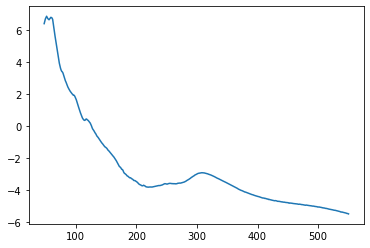

In [79]:
plt.plot(Profile.xFRF.values, Profile.Elevation.values)
plt.show()

In [80]:
Profile.xFRF.values[-1]

550

In DUCK94 there is another sensor in location 884.1 m

Bottom elevation of that point is approximately 7.943m

We assume that the profile has a straight line in the tail from 550 to 884 (m)

In [81]:
x_veri = [Profile.xFRF.values[-1], int(885)]
d_veri = [Profile.Elevation.values[-1], -7.94292251039597]


x = np.arange(int(Profile.xFRF.values[-1]), int(885), 1)

f = interpolate.interp1d(x_veri, d_veri, kind='linear')
d = f(x)
DF0 = pd.DataFrame({'xFRF': x, 'Elevation':d, 'yFRF': [y_value]*len(x)})
DF0

,xFRF,Elevation,yFRF
0,550,-5.509865,929
1,551,-5.517127,929
2,552,-5.524390,929
3,553,-5.531653,929
4,554,-5.538916,929
...,...,...,...
330,880,-7.906608,929
331,881,-7.913871,929
332,882,-7.921134,929
333,883,-7.928397,929


Finally profile will look like that in 929 m

In [82]:
Profile23 = pd.concat([Profile, DF0], axis=0, ignore_index=True)
Profile23

,xFRF,Elevation,yFRF
0,48,6.428599,929
1,49,6.580248,929
2,50,6.727013,929
3,51,6.815274,929
4,52,6.893706,929
...,...,...,...
831,880,-7.906608,929
832,881,-7.913871,929
833,882,-7.921134,929
834,883,-7.928397,929


In [101]:
date[o]

'19941121_FRF-new.xlsx'

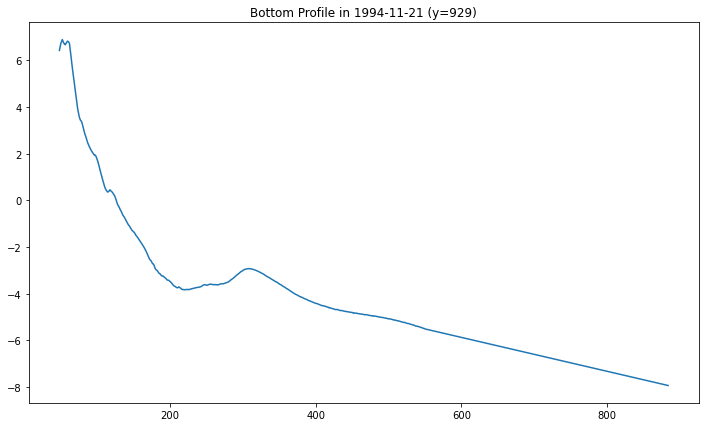

In [102]:
plt.figure(figsize=(12, 7))
plt.title("Bottom Profile in 1994-11-21 (y=929)")
plt.plot(Profile23.xFRF.values, Profile23.Elevation.values)
plt.show()

Export the profile to excel file

In [352]:
Profile23.to_excel(dir + '\\..\\Profiles\\' + date[o][0:8] + '.xlsx')

In [353]:
%ls

19941109.xlsx


In [34]:
o += 1
o

0

### Detailed Profile

In [50]:
#o = -1

In [114]:
Middle_2.loc[Middle_2['Elevation'] < 0]

,x,Elevation,y
78,126,-0.014293,960
79,127,-0.091141,960
80,128,-0.163232,960
81,129,-0.219064,960
82,130,-0.270788,960
...,...,...,...
330,378,-4.114012,960
331,379,-4.131998,960
332,380,-4.142133,960
333,381,-4.154120,960


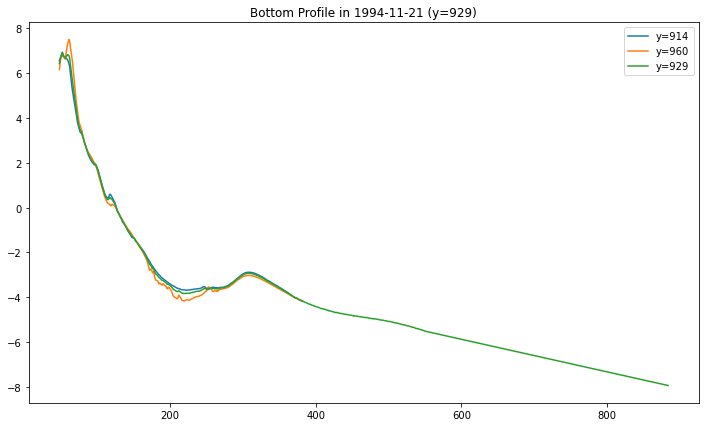

In [109]:
plt.figure(figsize=(12, 7))
plt.title("Bottom Profile in 1994-11-21 (y=929)")
plt.plot(Middle_1.x.values, Middle_1.Elevation.values, label="y=914")
plt.plot(Middle_2.x.values, Middle_2.Elevation.values, label="y=960")
plt.plot(Profile23.xFRF.values, Profile23.Elevation.values, label="y=929")
plt.legend(loc='best')
plt.show()

In [123]:
Middle_1.iloc[81:120, :]

,x,Elevation,y
83,129,-0.234217,914
84,130,-0.296420,914
85,131,-0.372327,914
86,132,-0.438481,914
87,133,-0.478147,914
88,134,-0.564646,914
89,135,-0.654678,914
90,136,-0.684028,914
91,137,-0.729124,914
92,138,-0.779061,914


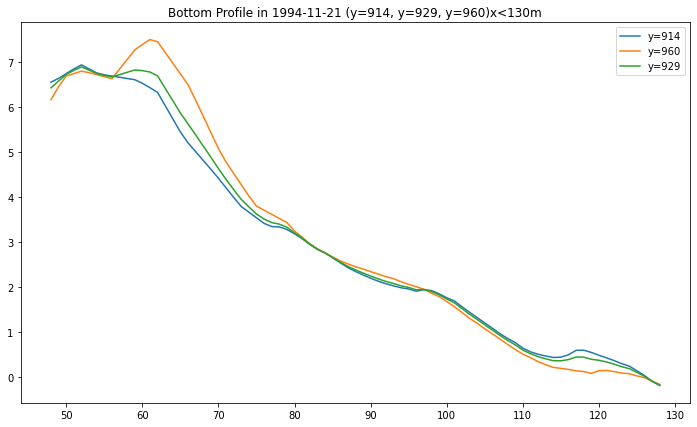

In [129]:
plt.figure(figsize=(12, 7))
plt.title("Bottom Profile in 1994-11-21 (y=914, y=929, y=960) x<130m")
plt.plot(Middle_1.iloc[:81, :].x.values, Middle_1.iloc[:81, :].Elevation.values, label="y=914")
plt.plot(Middle_2.iloc[:81, :].x.values, Middle_2.iloc[:81, :].Elevation.values, label="y=960")
plt.plot(Profile23.iloc[:81, :].xFRF.values, Profile23.iloc[:81, :].Elevation.values, label="y=929")
plt.legend(loc='best')
plt.show()

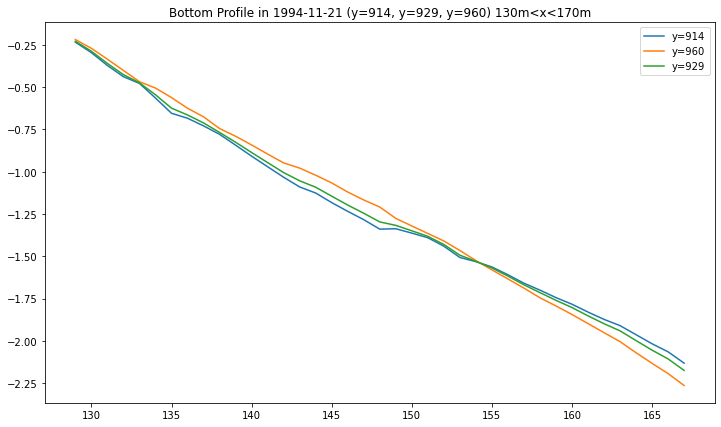

In [131]:
plt.figure(figsize=(12, 7))
plt.title("Bottom Profile in 1994-11-21 (y=914, y=929, y=960) 130m<x<170m")
plt.plot(Middle_1.iloc[81:120, :].x.values, Middle_1.iloc[81:120, :].Elevation.values, label="y=914")
plt.plot(Middle_2.iloc[81:120, :].x.values, Middle_2.iloc[81:120, :].Elevation.values, label="y=960")
plt.plot(Profile23.iloc[81:120, :].xFRF.values, Profile23.iloc[81:120, :].Elevation.values, label="y=929")
plt.legend(loc='best')
plt.show()

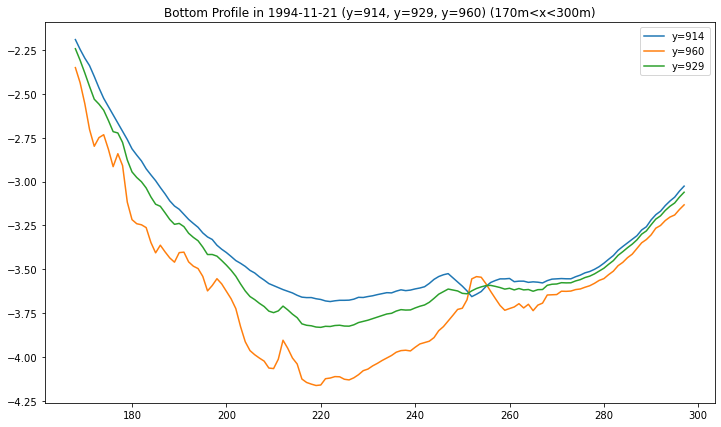

In [132]:
plt.figure(figsize=(12, 7))
plt.title("Bottom Profile in 1994-11-21 (y=914, y=929, y=960) (170m<x<300m)")
plt.plot(Middle_1.iloc[120:250, :].x.values, Middle_1.iloc[120:250, :].Elevation.values, label="y=914")
plt.plot(Middle_2.iloc[120:250, :].x.values, Middle_2.iloc[120:250, :].Elevation.values, label="y=960")
plt.plot(Profile23.iloc[120:250, :].xFRF.values, Profile23.iloc[120:250, :].Elevation.values, label="y=929")
plt.legend(loc='best')
plt.show()

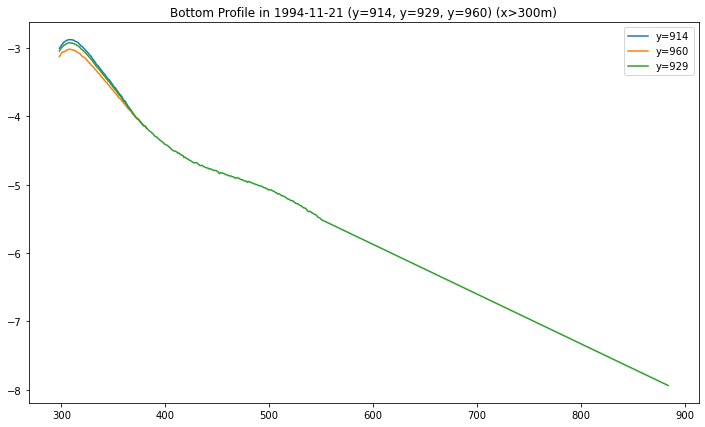

In [133]:
plt.figure(figsize=(12, 7))
plt.title("Bottom Profile in 1994-11-21 (y=914, y=929, y=960) (x>300m)")
plt.plot(Middle_1.iloc[250:, :].x.values, Middle_1.iloc[250:, :].Elevation.values, label="y=914")
plt.plot(Middle_2.iloc[250:, :].x.values, Middle_2.iloc[250:, :].Elevation.values, label="y=960")
plt.plot(Profile23.iloc[250:, :].xFRF.values, Profile23.iloc[250:, :].Elevation.values, label="y=929")
plt.legend(loc='best')
plt.show()

In [118]:
Middle_1.iloc[120:250, :]

,x,Elevation,y
122,168,-2.191563,914
123,169,-2.247390,914
124,170,-2.297266,914
125,171,-2.340036,914
126,172,-2.401459,914
...,...,...,...
247,293,-3.136894,914
248,294,-3.110830,914
249,295,-3.088787,914
250,296,-3.054711,914
